# BUILDING A MOVIE BASED RECOMMENDATION SYSTEM

# COMPANY : VEEGIL MEDIA

# NAME: OMONIYI TEMIDAYO ANDREW

# POSITION : DATA SCIENTIST

# EMAIL: omoniyiandrewai@gmail.com

# PHONE : 08166220117

- Definition of Term Recommendation system: It is a subclass of information filtering "system" that seeks to predict the "rating" or "Preference" a user would give an item.

# Implementing A Recommendation System:
This process can be carried out in 3 types namely.

- Popularity Based System: This is a recommendation system based on "trend". Usually it takes notes of what is currently trending
    examples: Apple music Trend, Youtube Top Trend,Netflix trending movies.
    
- Content Based System: This system uses features to recommend other items similar ro what the user likes, based on their previous
    actionns and explicit feedback.

- Collaborative Filter System : This is a family of algorithms where there are multiple ways to find similar users or items and 
    multiple ways to calculate rating based on rating of similar users. Usually this meathod is referred to as "Peer to Peer" 
    system of recommendation. Example Netflix usually this technique for its recommendation system.

# STEP 1: Import all necesary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('tmdb_5000_credits.csv') # df would represent the csv file of the movie
df.head() #Show the top first 5 table 

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


- STEP 1.1 : Performing Exploretory Data Analysis (EDA)

In [3]:
#Get the shape of the data.
df.shape #Shows 4 Columns and 4803 Rows

(4803, 4)

In [4]:
df.describe() #gives a better description of the dataset

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [5]:
df.info() #Give the column format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [6]:
df.columns #Show all the columns in the table

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [7]:
df.isnull().sum() # Looking for any empty cell

movie_id    0
title       0
cast        0
crew        0
dtype: int64

- Do the same process for the movies csv file

In [8]:
df2 = pd.read_csv('tmdb_5000_movies.csv')
df2.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [9]:
df2.shape

(4803, 20)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [11]:
df2.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [12]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [13]:
df2.isnull().sum() # It can be observe that they're missing values in this table.
# But this information would be ignor so as not to affect the table

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

# STEP 2: MERGE OR JOIN DATAFRAME

We would "Merge/Join/Append" the 'df' to 'df2'

- N:B : To merge/Join two tables together requires a unique column in the table which is usually called the "Primary Key : PK"
        For this Dataset the "PK" is the "movie_id:id". This is the similarity that would be used to join both tables.

In [14]:
#Merge df and df2 together
df.columns = ['id','title','cast','crew']
df2 = df2.merge(df,on='id')

In [15]:
df2.head(3)
#You would observe that new columns have been formed at the end of the new dataset

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [16]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [17]:
#Save the new dataset in your localdrive
'''df2.to_csv('C:/Users/AndyJazz/Documents/PYTHON WORK AI/Vilgee Media/VEEGIL_MEDIA.csv', index=None, header=True)'''

In [19]:
df3 = pd.read_csv('VEEGIL_MEDIA.csv')
df3.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


# STEP 2.1: Perform Different Calculation

In [18]:
#Calculate the Average vote mean
c = df2['vote_average'].mean()
c

6.092171559442011

In [19]:
#Minimum vote to be listed
m = df2['vote_count'].quantile(0.9) # This is played at 90% because we want of the 'cutoff'
m

1838.4000000000015

In [20]:
#Getting the list of movies to be lsted for recommendation
lists_movies = df2.copy().loc[df2['vote_count'] >= m]
lists_movies.shape

(481, 23)

In [21]:
#Defining a Function for weighted_rating
def weighted_rating(x, m=m, c=c):
    v = x['vote_count']
    R = x['vote_average']
    #Calculation based on IMBD formula (m=1838, c=6.09)
    return (v/(v+m) * R) + (m/(m+v) * c)

In [22]:
#Define a new feature 'score' and calculate its value with weighted_rating()
lists_movies['score'] = lists_movies.apply(weighted_rating, axis=1)

In [23]:
lists_movies.head(2) #NB : You would notice that score have been added at the end of the data

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696


In [24]:
lists_movies.shape

(481, 24)

In [25]:
#Sort the movies

#Sort movies based on score calculated above
lists_movies = lists_movies.sort_values('score', ascending=False)

#Print the top movies
lists_movies[['title_x', 'vote_count', 'vote_average', 'score']].head(10)

,title_x,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


# STEP 3: Recommendation Based on Trend/Number of Occurance

Text(0.5, 1.0, 'Movies Popularity')

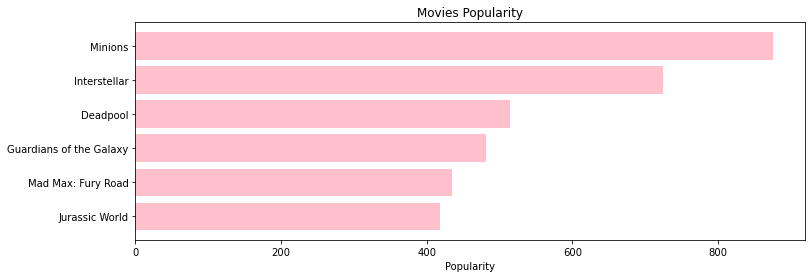

In [26]:
#Create a data visualization for the most popular movie
Popular = df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(Popular['title_x'].head(6),Popular['popularity'].head(6),color='pink')# 6 most popular movies
plt.gca().invert_yaxis()
plt.xlabel('Popularity')
plt.title("Movies Popularity")

Text(0.5, 1.0, 'Highest Budget')

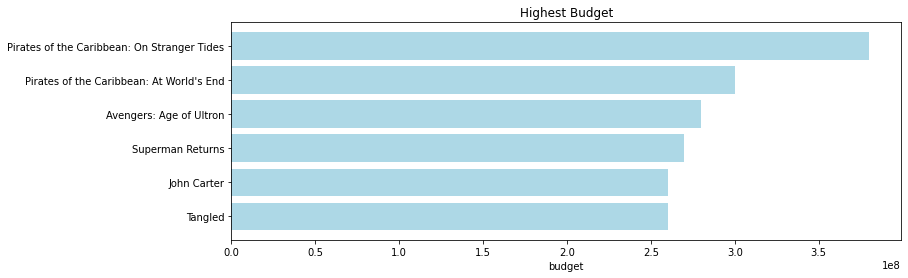

In [27]:
#Create a data visualization for movies based on budget
Budget = df2.sort_values('budget', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(Budget['title_x'].head(6),Budget['budget'].head(6),color='lightblue')# 6 most popular movies
plt.gca().invert_yaxis()
plt.xlabel('budget')
plt.title("Highest Budget")

Text(0.5, 1.0, 'Highest revenue')

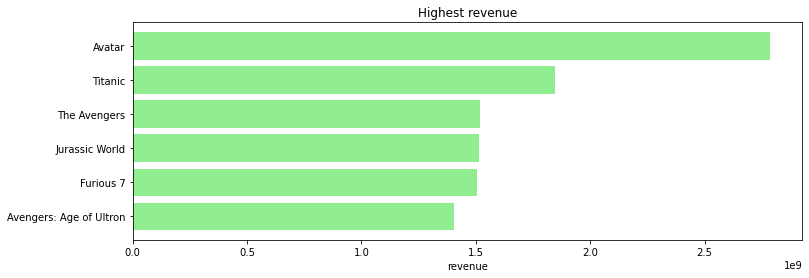

In [28]:
#Create a data visualization for movies based on revenue
Revenue = df2.sort_values('revenue', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(Revenue['title_x'].head(6),Revenue['revenue'].head(6),color='lightgreen')# 6 most popular movies
plt.gca().invert_yaxis()
plt.xlabel('revenue')
plt.title("Highest revenue")

Text(0.5, 1.0, 'Highest runtime')

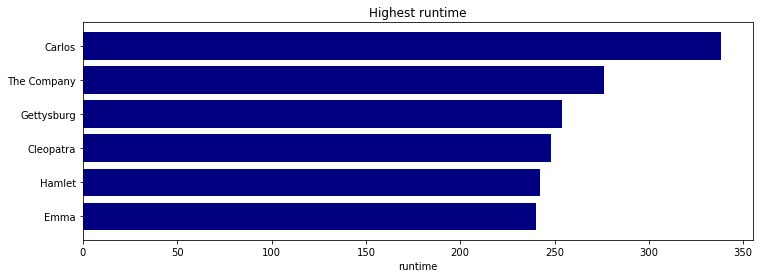

In [29]:
#Create a data visualization for movies based on Highest runtime
Runtime = df2.sort_values('runtime', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(Runtime['title_x'].head(6),Runtime['runtime'].head(6),color='navy')# 6 most popular movies
plt.gca().invert_yaxis()
plt.xlabel('runtime')
plt.title("Highest runtime")

In [30]:
#Drop the title_y column from the DtaFrame due to it being uneffective

lists_movies.drop(['title_y'], axis=1, inplace=True)

In [31]:
lists_movies.shape

(481, 23)

In [32]:
lists_movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,cast,crew,score
1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",...,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.059258
662,63000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxmovies.com/movies/fight-club,550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",...,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",7.939256


In [33]:
#Overview of Column: whiich is the movie description
df2['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

# STEP 4:  Content Based Recommendation System
    
- Content Based Recommendation : They make recommendation based on descriptive attributes of items.
    
    TYPES OF CONTENT BASED RECOMMENDATION:
        1. Distance Between two Vectors.
        2. Cosine Similarity.

In [34]:
'''
Based on the description we shall find the similarity among the movies
'''

from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop word suchas 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape


(4803, 20978)

In [35]:
#Improt linear_karnel
from sklearn.metrics.pairwise import linear_kernel

#Compute the cosine simolarity
cosine_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

In [36]:
#Construct a reverse map of indice and movies titles
indices = pd.Series(df2.index, index=df2['title_x']).drop_duplicates()

In [37]:
#Function that takes in movies titles as input and output most similar movies
def get_recommendations(title, cosine_similarity=cosine_similarity):
    #Get the index of the movie that mataches the title
    idx = indices[title]
    
    #Get the pairwise similarity scores of all movies with that movie
    similarity_scores = list(enumerate(cosine_similarity[idx]))
    
    #Sort the movies based on the similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    #Get the scores of the 10 most similar movies
    similarity_scores = similarity_scores[1:11]
    
    #Get the movies indices
    movie_indices = [i[0] for i in similarity_scores]
    
    #Return thetop 10 most similar movies
    return df2['title_x'].iloc[movie_indices]

In [38]:
get_recommendations('The Amazing Spider-Man')

38       The Amazing Spider-Man 2
159                    Spider-Man
5                    Spider-Man 3
1572    Forgetting Sarah Marshall
30                   Spider-Man 2
572                          Hook
143                           Pan
4246                      Trucker
1179              I Love You, Man
641                      Due Date
Name: title_x, dtype: object

In [39]:
get_recommendations('JFK')

2507                Slow Burn
879       Law Abiding Citizen
2020               The Rookie
2193     Secret in Their Eyes
2697                    Bobby
753              The Sentinel
1202             Legal Eagles
817          American Wedding
65            The Dark Knight
3       The Dark Knight Rises
Name: title_x, dtype: object

In [40]:
get_recommendations('Avatar')

3604                       Apollo 18
2130                    The American
634                       The Matrix
1341            The Inhabited Island
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
2628             Blood and Chocolate
Name: title_x, dtype: object

# For this project the Cosine Simarity was used due to the many advantages.